**FULL DISK MAP OF 171 A WAVELENGTH OF ATMOSPHERIC IMAGING ASSEMBLY USING FITS FILE. CREATING SUBMAP OF REGION OF INTEREST FOR LOOKING CLOSESLY TO THE SCENARIO UNDER CONSIDERATION.**

0.599488974
SDO/AIA
DATE-OBS is 2010-07-31T05:22:48.339
2046.55005
2050.79004
(4096, 4096)
<Helioprojective Frame (obstime=2010-07-31T05:22:48.339, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2010-07-31T05:22:48.339, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.0030025, 5.72192656, 1.51881847e+11)>)>


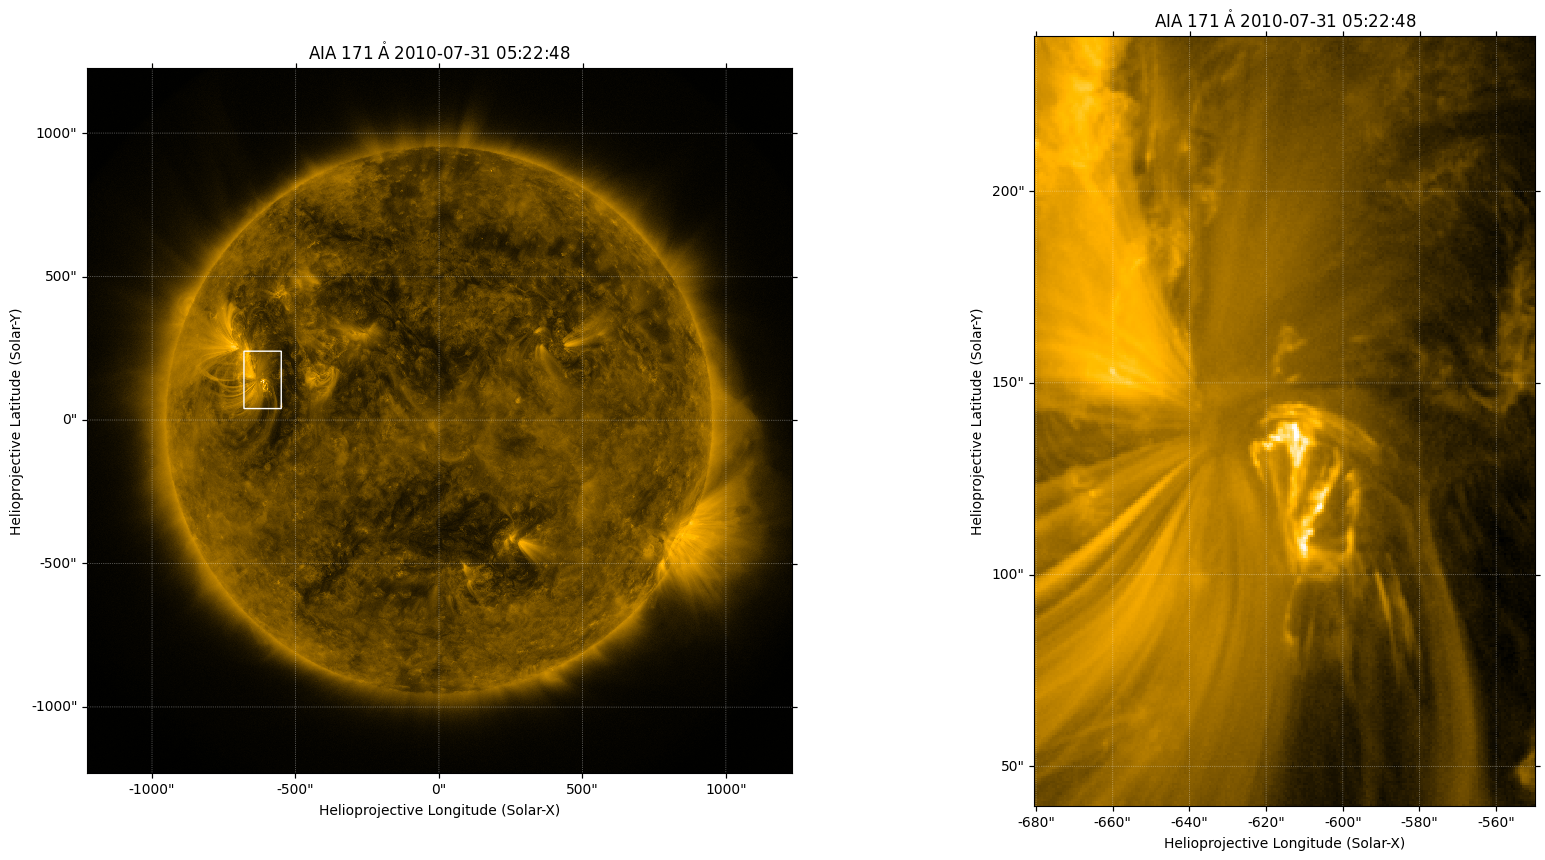

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
import sunpy.map
import sunpy.data.sample as sam
import astropy.units as u
import glob
import datetime
import sunpy.coordinates
from astropy.coordinates import SkyCoord
from scipy.ndimage import gaussian_filter, uniform_filter
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

aiamap=sunpy.map.Map('/home/dev/Sun/Aditya_L1/aia.lev1_euv_12s.2010-07-31T052249Z.171.image_lev1.fits')

head=aiamap.fits_header
#print(head)
print(head['CDELT1'])
print(head['TELESCOP'])
print('DATE-OBS is',head['DATE-OBS'])
print(head['CRPIX1'])
print(head['CRPIX2'])
print(np.shape(aiamap.data))
print(aiamap.coordinate_frame)
top_right=SkyCoord(-550*u.arcsec,240*u.arcsec,frame=aiamap.coordinate_frame)
bottom_left=SkyCoord(-680*u.arcsec,40*u.arcsec,frame=aiamap.coordinate_frame)
aia_submap=aiamap.submap(bottom_left,top_right=top_right)

fig=plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection=aiamap)
aiamap.plot()
aiamap.draw_quadrangle(bottom_left,height=200*u.arcsec,width=130*u.arcsec)
plt.subplot(1,2,2,projection=aia_submap)
aia_submap.plot()

plt.show()

WORKING WITH A SERIES OF IMAGES INSTEAD OF JUST ONE IMAGE TO CREATE ANIMATION

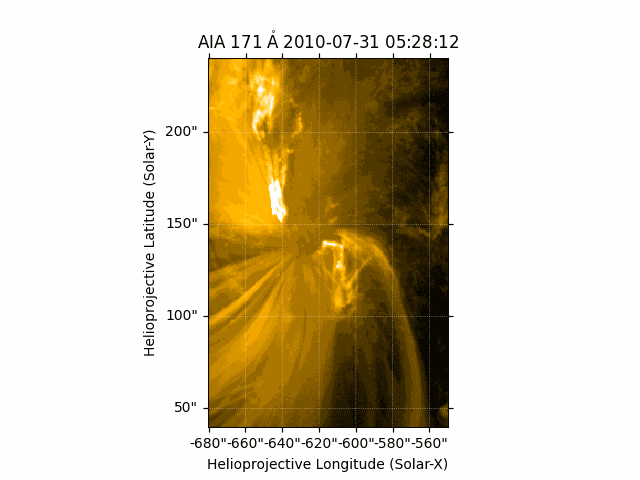

In [2]:
aia_171=glob.glob('/home/dev/Sun/Aditya_L1/aia.lev1_euv_12s*lev1.fits')
# print(aia_171)
aia_171.sort()
# print(aia_171)
for i in range(0,len(aia_171)):
  aia171=sunpy.map.Map(aia_171[i])
  
  top_right=SkyCoord(-550*u.arcsec,240*u.arcsec,frame=aia171.coordinate_frame)
  bottom_left=SkyCoord(-680*u.arcsec,40*u.arcsec,frame=aia171.coordinate_frame)
  aia_submap=aia171.submap(bottom_left,top_right=top_right)
  
  aia_submap.plot()
  plt.savefig('aiaimage'+str(i)+'.png')
plt.close()
from PIL import Image
frames=[]
imgs=glob.glob("*.png")
for j in imgs:
  new_frame=Image.open(j)
  frames.append(new_frame)
frames[0].save('AIA_image.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0) 

from IPython.display import Image
Image(url='...')  # external
fname = 'AIA_image.gif'
Image(open(fname, 'rb').read())  # local

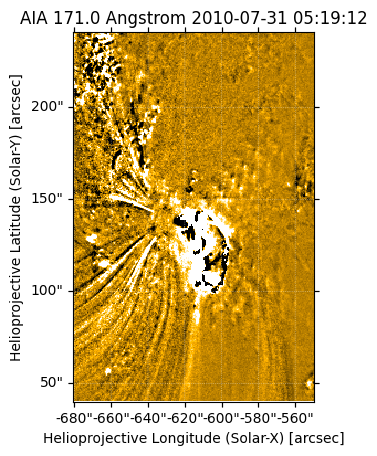

In [3]:
aia_171=glob.glob('/home/dev/Sun/Aditya_L1/aia.lev1_euv_12s*lev1.fits')
# print(aia_171)
aia_171.sort()
# print(aia_171)
aia171=sunpy.map.Map(aia_171[0])
seq_171=sunpy.map.Map(aia_171,sequence=True)

top_right=SkyCoord(-550*u.arcsec,240*u.arcsec,frame=aia171.coordinate_frame)
bottom_left=SkyCoord(-680*u.arcsec,40*u.arcsec,frame=aia171.coordinate_frame)
seq_171_submap=[]
#seq_running_171=[]
for i in range(0,len(seq_171)):
  seq_171_submap.append(seq_171[i].submap(bottom_left,top_right=top_right))
seq_running_171=sunpy.map.Map([m-prev_m.quantity for m, prev_m in zip(seq_171_submap[1:], seq_171_submap[:-1])],sequence=True)
# help(seq_running_171)
plt.figure()
seq_running_171.plot(norm=colors.Normalize(vmin=-200, vmax=200))

**HOW TO TAKE AND COMPARE BETWEEN IMAGES TAKEN BY DIFFERENT SPACECRAFTS LIKE AIA AND STEREO A!!! **


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
  Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3
699700000.0


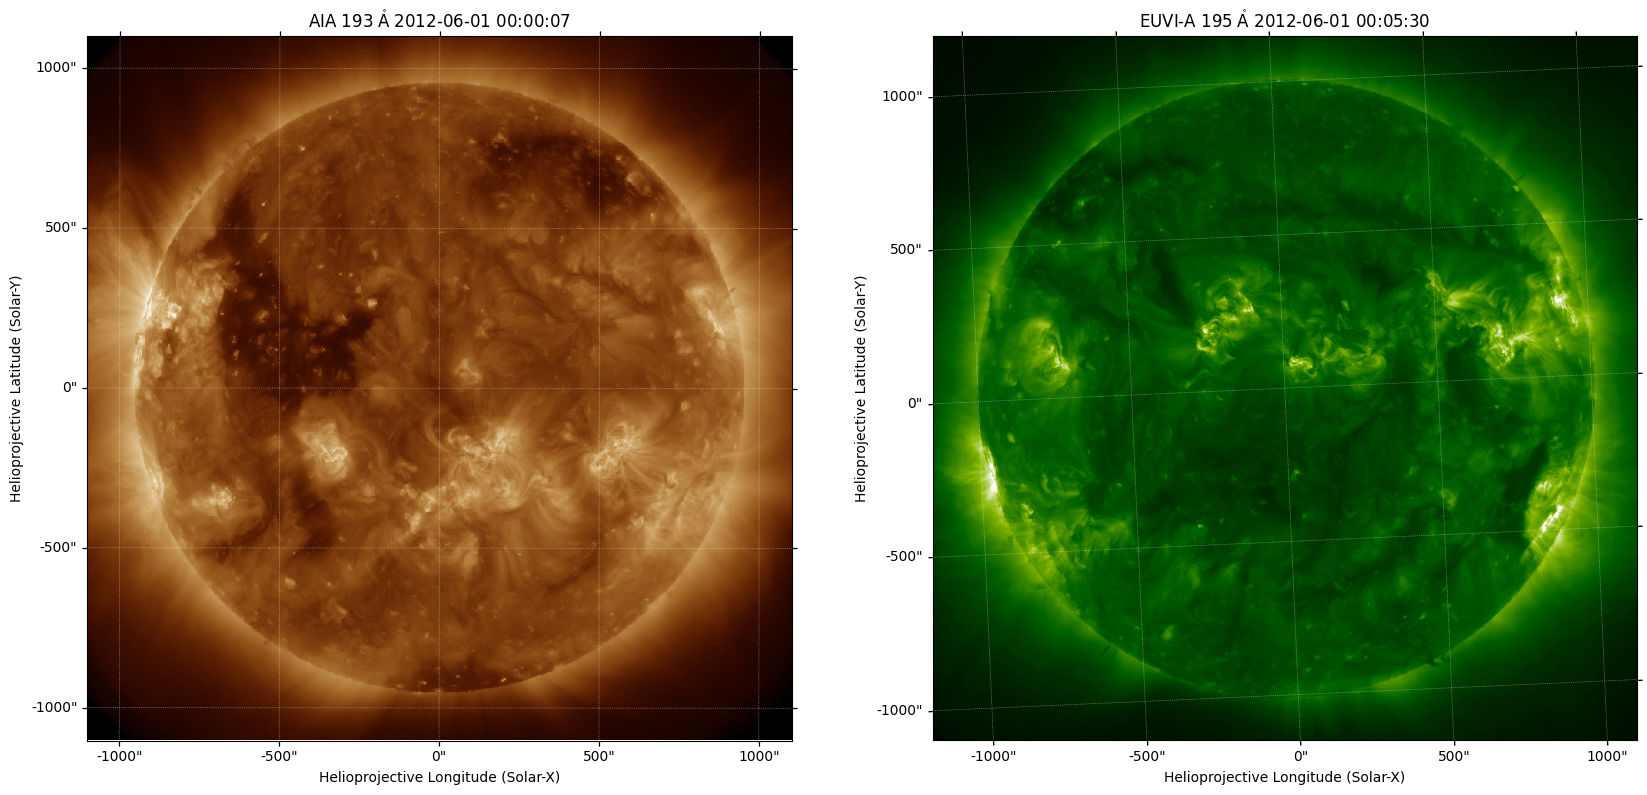

In [4]:
from sunpy.data.sample import AIA_193_JUN2012, STEREO_A_195_JUN2012
from sunpy.sun import constants
maps= {m.detector: m.submap(SkyCoord([-1100, 1100]*u.arcsec,
                                      [-1100, 1100]*u.arcsec,
                                      frame=m.coordinate_frame))
        for m in sunpy.map.Map([AIA_193_JUN2012, STEREO_A_195_JUN2012])}

maps['AIA'].plot_settings['vmin'] = 0  # set the minimum plotted pixel value

print(constants.radius)
print((constants.radius+4*u.Mm).to_value('m'))

for m in maps.values():
    m.meta['rsun_ref'] = (constants.radius + 4*u.Mm).to_value('m') # Formation height of 304 A has been taken into account

fig= plt.figure(figsize=(20, 10))
for i, m in enumerate(maps.values()):
    ax = fig.add_subplot(1, 2, i+1, projection=m)
    m.plot(axes=ax)

<SkyCoord (Helioprojective: obstime=2012-06-01T00:05:30.831, rsun=699700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2012-06-01T00:05:30.831, rsun=699700.0 km): (lon, lat, radius) in (deg, deg, m)
    (116.29405786, 6.81772843, 1.43457186e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
    (-779.65052512, 243.90553172, 1.43047687e+11)>


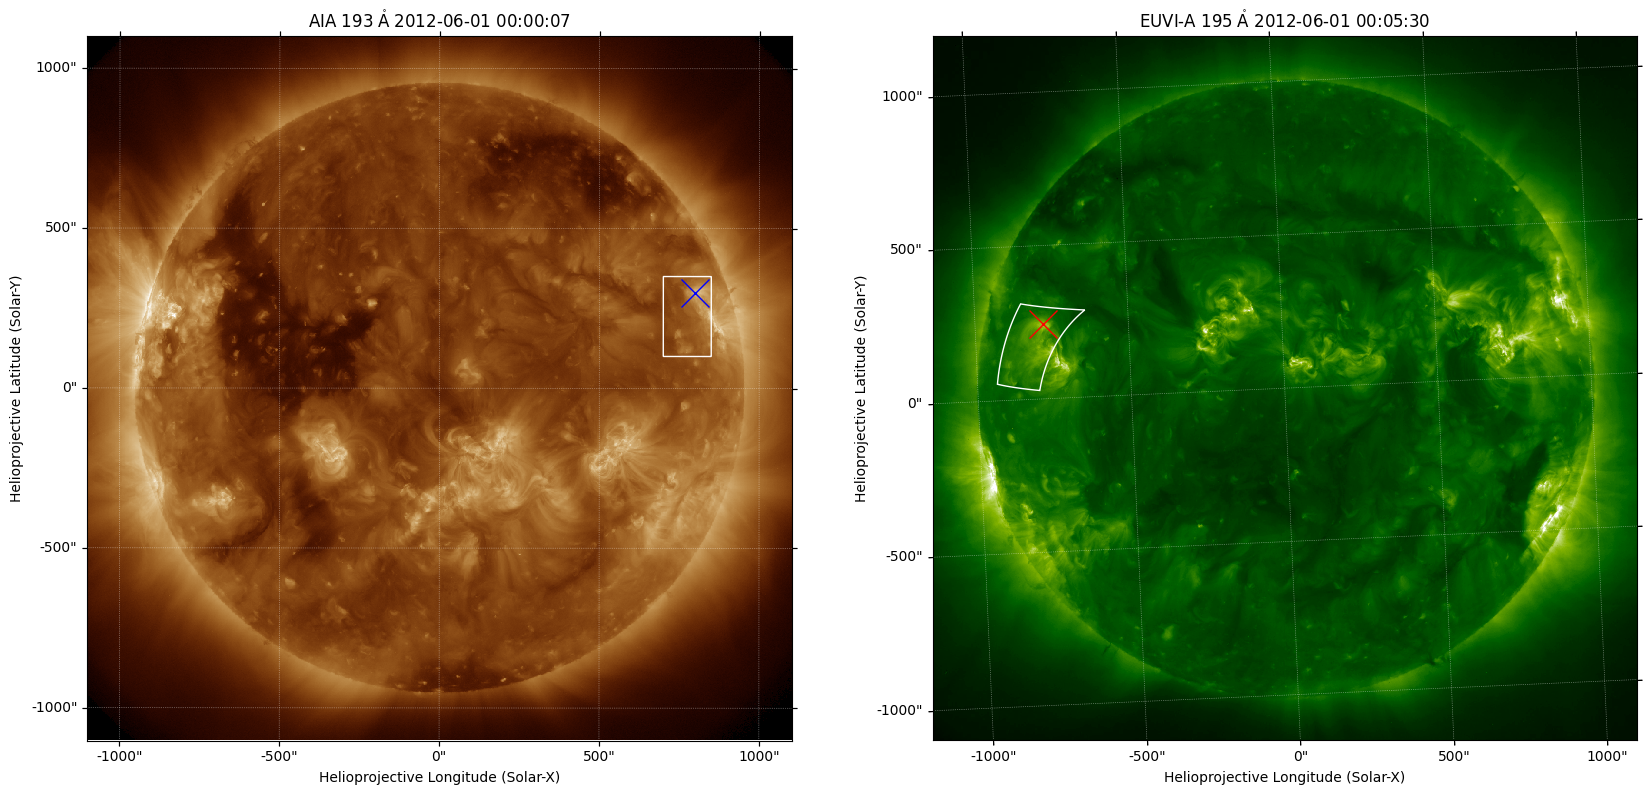

In [5]:
aia_bottom_left= SkyCoord(700 * u.arcsec,100 * u.arcsec,frame=maps['AIA'].coordinate_frame)
aia_top_right= SkyCoord(850 * u.arcsec,350 * u.arcsec,frame=maps['AIA'].coordinate_frame)

feature_aia= SkyCoord(800 * u.arcsec,300 * u.arcsec,frame=maps['AIA'].coordinate_frame)

fig= plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=maps['AIA'])
maps['AIA'].plot(axes=ax1)
maps['AIA'].draw_quadrangle(aia_bottom_left, top_right=aia_top_right,axes=ax1)
ax1.plot_coord(feature_aia,'bx',fillstyle='none',markersize=20,color='b')

print(feature_aia.transform_to(maps['EUVI'].coordinate_frame)) # Transform the coordinates to coordinates as seen by stereo-A

ax2 = fig.add_subplot(122,projection=maps['EUVI'])
maps['EUVI'].plot(axes=ax2)
maps['AIA'].draw_quadrangle(aia_bottom_left, top_right=aia_top_right,axes=ax2)
ax2.plot_coord(feature_aia,'bx',fillstyle='none',markersize=20,color='r')


Have a look at Rhessi and Goes Time Series


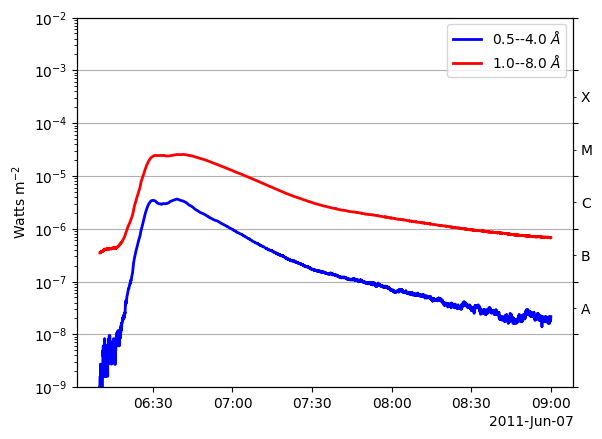

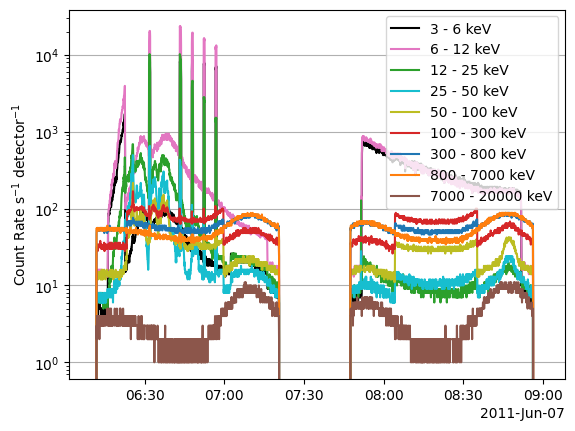

In [6]:
from sunpy.data.sample import GOES_XRS_TIMESERIES
from sunpy.data.sample import RHESSI_TIMESERIES
from sunpy.timeseries import TimeSeries
import numpy as np

goes_lc = TimeSeries(GOES_XRS_TIMESERIES)
rhessi_lc=TimeSeries(RHESSI_TIMESERIES)

lc_goes = goes_lc.truncate('2011/06/07 06:10', '2011/06/07 09:00')
lc_rhessi = rhessi_lc.truncate('2011/06/07 06:10', '2011/06/07 09:00')

plt.figure(1)
lc_goes.plot()

plt.figure(2)
lc_rhessi.plot()
plt.legend(loc='upper right')

FINDING POWER SPECTRUM OF TIME SERIES


Text(0, 0.5, 'Power')

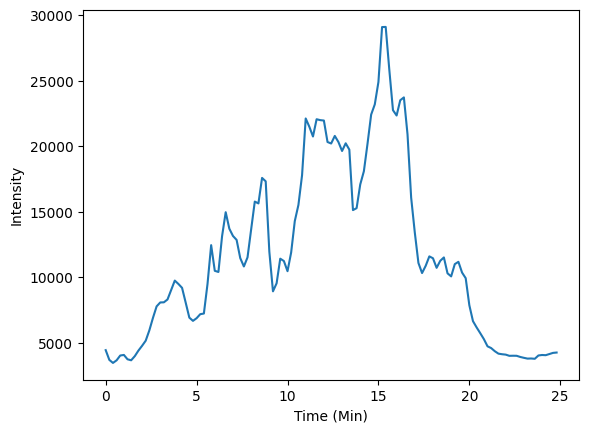

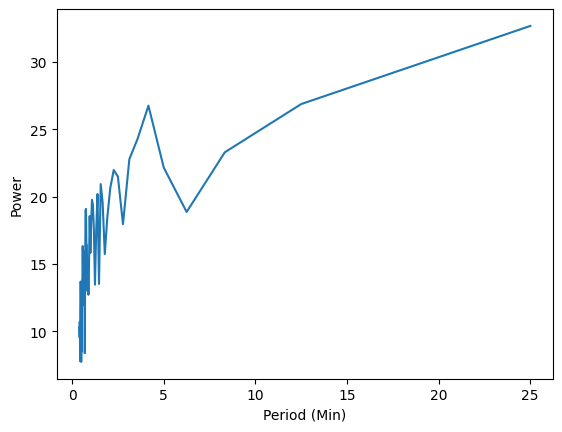

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
t,f=np.loadtxt('/home/dev/Sun/Aditya_L1/inttime_171_6Mm.txt',unpack='true')

timestep=(t[1]-t[0])*60.
n=len(t)
power=np.log10(abs(np.fft.fft(f)))**2
freq=np.fft.fftfreq(n,d=timestep)

freq_plot=[]
pow_plot=[]
period_plot=[]

for i in range(0,len(freq)):
  if freq[i] >= 0.0:
    freq_plot.append(freq[i])
    pow_plot.append(power[i])
    period_plot.append((1/freq[i])/60.)



plt.figure(1)
plt.plot(t,f)
plt.xlabel('Time (Min)')
plt.ylabel('Intensity')

plt.figure(2)
plt.plot(period_plot,pow_plot)
plt.xlabel('Period (Min)')
plt.ylabel('Power')

In [8]:
from astropy.table import Table
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
file_lc=Table.read('/home/dev/Sun/Aditya_L1/stellar_lc.fits',hdu=1)
file_lc.info()

<Table length=1120>
  name   dtype   unit 
------- ------- ------
   TIME float64      s
   RATE float32 ct / s
  ERROR float32 ct / s
 COUNTS float32    cts
 ERRCTS float32    cts
FRACEXP float32       
  BACKV float32 ct / s
  BACKE float32 ct / s


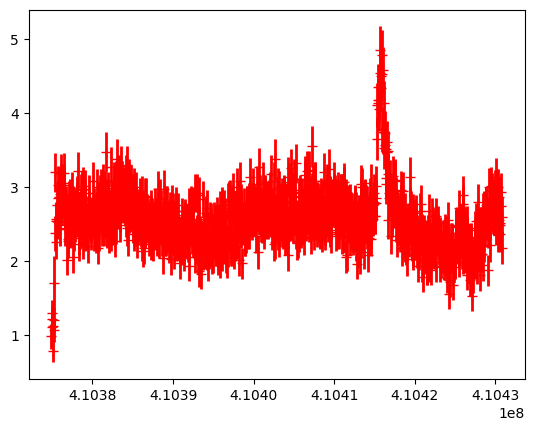

In [9]:
Time = file_lc["TIME"]
Rate = file_lc["RATE"]
Rate_err = file_lc["ERROR"]
plt.errorbar(Time, Rate, yerr = Rate_err, xerr = 0, fmt = "+", markersize = 7, color = "red", ecolor = "red", label = "Data", elinewidth = 2, capsize = 0)
plt.show()


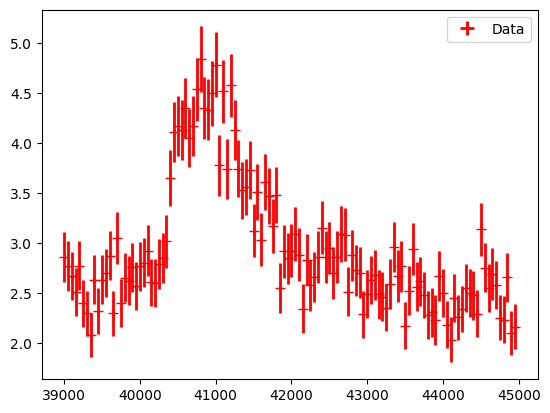

In [13]:
plt.errorbar(Time[780:900], Rate[780:900], yerr = Rate_err[780:900], xerr = 0, fmt = "+", markersize = 7, color = "red", ecolor = "red", label = "Data", elinewidth = 2, capsize = 0)
plt.legend()
plt.show()

-------------
Rise time:1493370.7307715097+-908147.2904718991
Decay time:61323.610179299016+-7327.931064042538
A:2.615933220698242+-0.024650820601387555
B:2.716610603629043+-0.04433543773170174


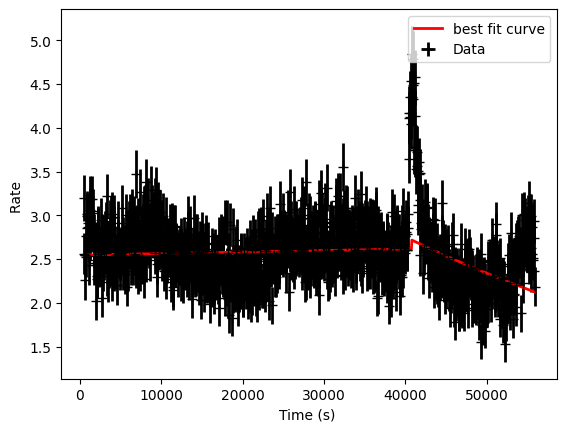

In [11]:
Time = Time - Time[0]
c0 = np.average(Rate[0:780])
t_start = Time[10]
t_peak = Time[816]

def fun_model(t, t_rise, t_decay, A, B):
  c_t = []
  for t in t:
    if (t<t_peak and t>= t_start):
      c_t.append(A*np.exp((t-t_peak)/t_rise))
    elif(t>=t_peak):
      c_t.append(B*np.exp(-(t-t_peak)/t_decay))
  return c_t

x_data = Time[10:-1]
y_data = Rate[10:-1]
sig = Rate_err[10:-1]

tr_guess = 100
td_guess = 1000
A_guess = 4
B_guess = 4
popt, pcov = curve_fit(fun_model, x_data, y_data, sigma = sig, p0 = [tr_guess, td_guess, A_guess, B_guess])
perr = np.sqrt(np.diag(pcov))
print('-------------')
pos = ('Rise time:', 'Decay time:', 'A:', 'B:')
for i in range(len(popt)):
  print(str(pos[i])+str(popt[i])+'+-'+str(perr[i]))

fit = fun_model(x_data, *popt)
plt.errorbar(x_data, y_data, yerr =  sig, xerr = 0, fmt = "+", markersize = 7, color = "black", ecolor = "black", label = "Data", elinewidth = 2, capsize = 0)
plt.xlabel('Time (s) ')
plt.ylabel('Rate ')
plt.plot(x_data, fit, 'r', lw = 2, label = 'best fit curve')
plt.legend(loc='upper right', fontsize=10)
plt.show()

In [12]:
from PIL import Image
frames=[]
imgs=glob.glob("/home/dev/Sun/Aditya_L1/STEREO171A/"+"*.jpg")
for j in imgs:
  new_frame=Image.open(j)
  frames.append(new_frame)
frames[0].save('STEREO_image.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0) 

from IPython.display import Image
Image(url='...')  # external
fname = 'STEREO_image.gif'
Image(open(fname, 'rb').read())  # local

IndexError: list index out of range